--------
Import packages
-------

In [1]:
import numpy as np
import netCDF4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from pylab import *
from matplotlib import *
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm

from plot_map import map
from plot_lat_av import lat_plot

Import Climatology Data
-------

In [103]:
nc_a = '../data/2000-2010/TOM12_JG_1AA6_TChl_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')

nc_b = '../data/TOM12_JG_1AA6/TOM12_JG_1AA6_TChl_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')

nc_c = '../data/TOM12_JG_1BA6/TOM12_JG_1BA6_TChl_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')


In [104]:
nc_d = '../data/2000-2010/TOM12_JG_1AA6_EXP_2000_2010_clim.nc'
nc_dd = Dataset(nc_d, 'r')

nc_e = '../data/TOM12_JG_1AA6/TOM12_JG_1AA6_EXP_2090_2100_clim.nc'
nc_ed = Dataset(nc_e, 'r')

nc_f = '../data/TOM12_JG_1BA6/TOM12_JG_1BA6_EXP_2090_2100_clim.nc'
nc_fd = Dataset(nc_f, 'r')


In [105]:
nc_g = '../data/2000-2010/TOM12_JG_1AA6_PPT_2000_2010_clim.nc'
nc_gd = Dataset(nc_g, 'r')

nc_h = '../data/TOM12_JG_1AA6/TOM12_JG_1AA6_PPT_2090_2100_clim.nc'
nc_hd = Dataset(nc_h, 'r')

nc_i = '../data/TOM12_JG_1BA6/TOM12_JG_1BA6_PPT_2090_2100_clim.nc'
nc_id = Dataset(nc_i, 'r')


In [106]:
nc_j = '../data/2000-2010/TOM12_JG_1AA6_tos_2000_2010_clim.nc'
nc_jd = Dataset(nc_j, 'r')

nc_k = '../data/TOM12_JG_1AA6/TOM12_JG_1AA6_tos_2090_2100_clim.nc'
nc_kd = Dataset(nc_k, 'r')

nc_l = '../data/TOM12_JG_1BA6/TOM12_JG_1BA6_tos_2090_2100_clim.nc'
nc_ld = Dataset(nc_l, 'r')

In [107]:
nc_m = '../data/2000-2010/TOM12_JG_1AA6_mldr10_1_2000_2010_clim.nc'
nc_md = Dataset(nc_m, 'r')

nc_n = '../data/TOM12_JG_1AA6/TOM12_JG_1AA6_mldr10_1_2090_2100_clim.nc'
nc_nd = Dataset(nc_n, 'r')

nc_o = '../data/TOM12_JG_1BA6/TOM12_JG_1BA6_mldr10_1_2090_2100_clim.nc'
nc_od = Dataset(nc_o, 'r')

In [108]:
phenology_a = np.load('../data/phenology/2000_2010_phenology.npy')
phenology_b = np.load('../data/phenology/TOM12_JG_1AA6_2090_2100_phenology.npy')
phenology_c = np.load('../data/phenology/TOM12_JG_1BA6_2090_2100_phenology.npy')

dur_a = phenology_a[3,:,:]
dur_b = phenology_b[3,:,:]
dur_c = phenology_c[3,:,:]

start_1a = phenology_a[0,:,:]
start_2a = phenology_b[0,:,:]
start_3a = phenology_c[0,:,:]

tmax_1a = phenology_a[1,:,:]
tmax_2a = phenology_b[1,:,:]
tmax_3a = phenology_c[1,:,:]

end_1a = phenology_a[2,:,:]
end_2a = phenology_b[2,:,:]
end_3a = phenology_c[2,:,:]

In [8]:
start_1ab = np.stack((start_1a, start_2a), axis=0)
start_1ac = np.stack((start_1a, start_3a), axis=0)

tmax_1ab = np.stack((tmax_1a, tmax_2a), axis=0)
tmax_1ac = np.stack((tmax_1a, tmax_3a), axis=0)

end_1ab = np.stack((end_1a, end_2a), axis=0)
end_1ac = np.stack((end_1a, end_3a), axis=0)

In [ ]:
start_1ab.shape

In [ ]:
from date_standardisation_2decade import standard_dates

In [ ]:
np.nanmax(start_a)

In [10]:
nc_00 = '../data/PIH3_tchl_2000_regrid_k1.nc'
nc_00d = Dataset(nc_00, 'r')

In [ ]:
start_standardised_ab, tmax_standardised_ab, end_standardised_ab = standard_dates(start_1ab,
                                                                         tmax_1ab,
                                                                         end_1ab)

In [ ]:
start_standardised_ac, tmax_standardised_ac, end_standardised_ac = standard_dates(start_1ac,
                                                                         tmax_1ac,
                                                                         end_1ac)

In [ ]:
start_a = start_standardised_ab[0,:,:]
start_b = start_standardised_ab[1,:,:]
start_c = start_standardised_ac[1,:,:]

In [109]:
tchl_a = np.squeeze(nc_ad.variables['DAILYCLIM'][:], axis=1)*1e6*12
tchl_b = np.squeeze(nc_bd.variables['DAILYCLIM'][:], axis=1)*1e6*12
tchl_c = np.squeeze(nc_cd.variables['DAILYCLIM'][:], axis=1)*1e6*12

exp_a = np.squeeze(nc_dd.variables['DAILYCLIM'][:], axis=1)*12*1e3*86400
exp_b = np.squeeze(nc_ed.variables['DAILYCLIM'][:], axis=1)*12*1e3*86400
exp_c = np.squeeze(nc_fd.variables['DAILYCLIM'][:], axis=1)*12*1e3*86400

ppt_a = nc_gd.variables['DAILYCLIM'][:]*12*1e3*86400*10
ppt_b = nc_hd.variables['DAILYCLIM'][:]*12*1e3*86400*10
ppt_c = nc_id.variables['DAILYCLIM'][:]*12*1e3*86400*10


tos_a = nc_jd.variables['DAILYCLIM'][:]
tos_b = nc_kd.variables['DAILYCLIM'][:]
tos_c = nc_ld.variables['DAILYCLIM'][:]

mld_a = nc_md.variables['DAILYCLIM'][:]
mld_b = nc_nd.variables['DAILYCLIM'][:]
mld_c = nc_od.variables['DAILYCLIM'][:]

lat1 = nc_00d.variables['Y'][:]
lon1 = nc_00d.variables['X'][:]

In [12]:
#tchl = np.squeeze(tchla1, axis=1)
print(tchl_a.shape)
print(lat1.shape)
print(lon1.shape)

(365, 180, 360)
(180,)
(360,)


In [13]:
lon2, lat2 = np.meshgrid(lon1,lat1)

In [14]:
print(lon2.shape)
print(lat2.shape)

(180, 360)
(180, 360)


### Global Line Graphs

In [15]:
tchl_a.shape
tchl_b.shape
tchl_c.shape

(365, 180, 360)

In [16]:
mean_a = np.nanmean(tchl_a, axis=(1, 2))

mean_b = np.nanmean(tchl_b, axis=(1, 2))

mean_c = np.nanmean(tchl_c, axis=(1, 2))


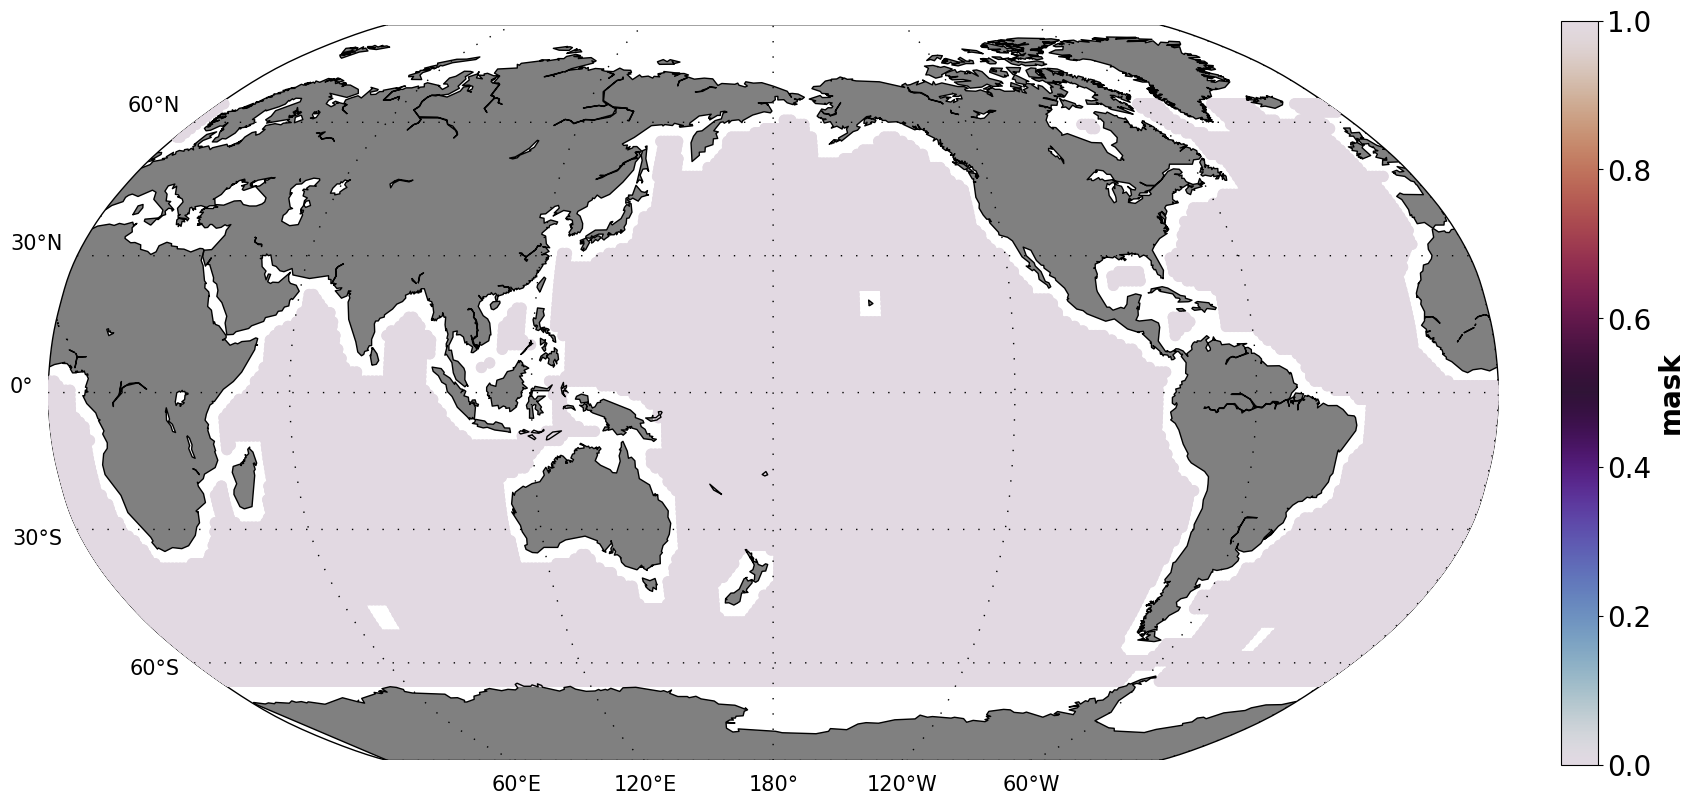

In [17]:
# Check Mask

mask1 = np.load("../data/masks/mask_clim.npy")

mask = np.ones((180,360))
mask = mask * np.nan


for i in np.arange(25,155,1):
    for j in np.arange(0,360,1):
        if mask1[i,j] > 0:
            mask[i,j] = mask1[i,j]

from scipy.ndimage import binary_dilation
import numpy as np
from scipy.ndimage.morphology import generate_binary_structure

# Define a 2D circular structuring element
structure_element = generate_binary_structure(2, 2)

# Identify land regions in the mask using np.isnan
land_regions = np.isnan(mask)

# Create a latitude mask where values above 65N and below 65S are set to True
latitudes = np.linspace(-90, 90, mask.shape[0])  # Assuming your mask has shape (180, 360) or similar
latitude_mask = (latitudes > 65) | (latitudes < -65)
latitude_mask_2D = np.repeat(latitude_mask[:, np.newaxis], mask.shape[1], axis=1)

# Save the original state of polar regions
polar_regions_original = np.copy(land_regions)
polar_regions_original[~latitude_mask_2D] = False

# Dilate the non-polar regions
land_regions[latitude_mask_2D] = False
buffered_land = binary_dilation(land_regions, structure=structure_element, iterations=3)

# Restore the original state of polar regions
buffered_land[latitude_mask_2D] = polar_regions_original[latitude_mask_2D]

# The desired mask will be the inverse of buffered_land
final_mask = np.logical_not(buffered_land)

# Convert all zeros in final_mask to NaN
final_mask = final_mask.astype(float)
final_mask[final_mask == 0] = np.nan



map(final_mask, lon2, lat2, 0, 1, 'twilight', 'mask')

In [110]:
ef_a = (((exp_a)/(ppt_a))*100)*final_mask
ef_b = (((exp_b)/(ppt_b))*100)*final_mask
ef_c = (((exp_c)/(ppt_c))*100)*final_mask

In [ ]:
efmean_a = (((np.nanmean(exp_a, axis=0)*final_mask)/((np.nanmean(ppt_a, axis=0)*final_mask)))*100)
efmean_b = (((np.nanmean(exp_b, axis=0)*final_mask)/((np.nanmean(ppt_b, axis=0)*final_mask)))*100)
efmean_c = (((np.nanmean(exp_c, axis=0)*final_mask)/((np.nanmean(ppt_c, axis=0)*final_mask)))*100)

In [ ]:
print('EXP')
print(np.nanmean(exp_a*final_mask))
print(np.nanmean(exp_b*final_mask))
print(np.nanmean(exp_c*final_mask))
print(' ')
print('PPT')
print(np.nanmean(ppt_a*final_mask))
print(np.nanmean(ppt_b*final_mask))
print(np.nanmean(ppt_c*final_mask))
print(' ')
print('EF - average after calculation')
print(np.nanmean(ef_a))
print(np.nanmean(ef_b))
print(np.nanmean(ef_c))
print(' ')
print('EF - temporal average before calculation')
print(np.nanmean(efmean_a))
print(np.nanmean(efmean_b))
print(np.nanmean(efmean_c))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tchl_a_mean = np.nanmean(tos_a, axis=0)
# Setting the upper half (Northern Hemisphere) to 4000
tchl_a_mean[:90, :] = -1000

map(tchl_a_mean, lon2, lat2, 0, 30, 'viridis', 'duration')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def confidence_interval(data, hemisphere):
    # Assuming data is a 3D array with shape (365, 180, 360)
    # Hemisphere selection: 'N' for Northern, 'S' for Southern
    if hemisphere == 'N':
        data = data[:, 90:, :]  # Select top half for Northern Hemisphere
    elif hemisphere == 'S':
        data = data[:, :90, :]  # Select bottom half for Southern Hemisphere
    
    mean = np.nanmean(data, axis=(1, 2))
    se = np.ones(mean.shape)*np.nan
    ci = np.ones(mean.shape)*np.nan

    for day in range(data.shape[0]):
        daily_data = data[day, ~np.isnan(data[day])]
        n = daily_data.size
        if n > 1:
            se[day] = stats.sem(daily_data, nan_policy='omit')
            ci[day] = se[day] * stats.t.ppf((1 + 0.95) / 2., n - 1)

    return mean, ci

def plot_line_graph(data1, data2, data3, label1, label2, label3, ylabel):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

    # Compute confidence intervals for both hemispheres
    mean_a_N, ci_a_N = confidence_interval(data1, 'N')
    mean_b_N, ci_b_N = confidence_interval(data2, 'N')
    mean_c_N, ci_c_N = confidence_interval(data3, 'N')
    mean_a_S, ci_a_S = confidence_interval(data1, 'S')
    mean_b_S, ci_b_S = confidence_interval(data2, 'S')
    mean_c_S, ci_c_S = confidence_interval(data3, 'S')

    # Determine the overall min and max values for y-axis limits
    all_means = np.concatenate([mean_a_N, mean_b_N, mean_c_N, mean_a_S, mean_b_S, mean_c_S])
    all_cis = np.concatenate([ci_a_N, ci_b_N, ci_c_N, ci_a_S, ci_b_S, ci_c_S])
    min_limit = np.min(all_means - all_cis)
    max_limit = np.max(all_means + all_cis)

    days = np.arange(1, 366)

    def plot_with_confidence_intervals(ax, days, mean, ci, label, color):
        ax.plot(days, mean, label=label, color=color, linewidth=2)
        lower_bound = mean
        upper_bound = mean
        ax.fill_between(days, lower_bound, upper_bound, color=color, alpha=0.1)

    # Plot data for Northern Hemisphere
    plot_with_confidence_intervals(axes[0], days, mean_a_N, ci_a_N, label1, '#1965B0')
    plot_with_confidence_intervals(axes[0], days, mean_b_N, ci_b_N, label2, '#90C987')
    plot_with_confidence_intervals(axes[0], days, mean_c_N, ci_c_N, label3, '#F1932D')
    axes[0].set_title('Northern Hemisphere')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel(ylabel, fontsize=12)

    # Plot data for Southern Hemisphere
    plot_with_confidence_intervals(axes[1], days, mean_a_S, ci_a_S, label1, '#1965B0')
    plot_with_confidence_intervals(axes[1], days, mean_b_S, ci_b_S, label2, '#90C987')
    plot_with_confidence_intervals(axes[1], days, mean_c_S, ci_c_S, label3, '#F1932D')
    axes[1].set_title('Southern Hemisphere')
    axes[1].set_xlabel('Month', fontsize=12)

    # Set the same y-axis limits for both subplots
    axes[0].set_ylim(min_limit, max_limit)
    axes[1].set_ylim(min_limit, max_limit)

    # Common settings for both subplots
    month_midpoints = [15, 45, 75, 106, 136, 167, 197, 228, 259, 289, 320, 350]
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 365]

    for ax in axes:
        ax.set_xticks(month_midpoints, labels=month_labels)
        ax.set_xticks(month_starts, minor=True)
        ax.tick_params(axis='x', which='minor', length=6, labelsize=12)
        ax.tick_params(axis='y', which='major', length=2, labelsize=12)
        
    axes[1].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
ppt_a_N = np.nanmean(ppt_a[:, 90:, :], axis=(1,2))
ppt_a_S = np.nanmean(ppt_a[:, :90, :], axis=(1,2))
ppt_b_N = np.nanmean(ppt_b[:, 90:, :], axis=(1,2))
ppt_b_S = np.nanmean(ppt_b[:, :90, :], axis=(1,2))
ppt_c_N = np.nanmean(ppt_c[:, 90:, :], axis=(1,2))
ppt_c_S = np.nanmean(ppt_c[:, :90, :], axis=(1,2))

In [ ]:
ppt_b_N

In [ ]:
ef_diff_ab = np.nanmean(((np.nanmean(ef_b*final_mask, axis=0) - np.nanmean(ef_a*final_mask, axis=0))/np.nanmean(ef_a*final_mask, axis=0))*100*final_mask)
ef_diff_ac = np.nanmean(((np.nanmean(ef_c*final_mask, axis=0) - np.nanmean(ef_a*final_mask, axis=0))/np.nanmean(ef_a*final_mask, axis=0))*100*final_mask)


print(ef_diff_ab)
print(ef_diff_ac)

In [ ]:
ppt_a_mean = ppt_a*mask
ppt_b_mean = ppt_b*mask
ppt_c_mean = ppt_c*mask

ppt_ab_diff = (ppt_b_mean - ppt_a_mean)/ppt_a_mean

ppt_ac_diff = (ppt_c_mean - ppt_a_mean)/ppt_a_mean

print(np.nanmean(ppt_ab_diff), np.nanmean(ppt_ac_diff))

In [ ]:
tchl_a_mea = tchl_a*mask
tchl_b_mean = tchl_b*mask
tchl_c_mean = tchl_c*mask

tchl_ab_diff = (tchl_b_mean - tchl_a_mean)/tchl_a_mean

tchl_ac_diff = (tchl_c_mean - tchl_a_mean)/tchl_a_mean

print(np.nanmean(tchl_ab_diff), np.nanmean(tchl_ac_diff))

In [ ]:
ppt_ab_N_diff = (ppt_b_N - ppt_a_N)/ppt_a_N
ppt_ab_S_diff = (ppt_b_S - ppt_a_S)/ppt_a_S

ppt_ac_N_diff = (ppt_c_N - ppt_a_N)/ppt_a_N
ppt_ac_S_diff = (ppt_c_S - ppt_a_S)/ppt_a_S

ppt_bc_S_diff = (ppt_c_S - ppt_b_S)/ppt_b_S

print(np.nanmin(ppt_ab_N_diff), np.nanmax(ppt_ab_S_diff))
print(np.nanmin(ppt_ac_N_diff), np.nanmax(ppt_ac_S_diff))
print(np.nanmax(ppt_bc_S_diff))

In [ ]:
exp_a_N = np.nanmean(exp_a[:, 90:, :], axis=(1,2))
exp_a_S = np.nanmean(exp_a[:, :90, :], axis=(1,2))
exp_b_N = np.nanmean(exp_b[:, 90:, :], axis=(1,2))
exp_b_S = np.nanmean(exp_b[:, :90, :], axis=(1,2))
exp_c_N = np.nanmean(exp_c[:, 90:, :], axis=(1,2))
exp_c_S = np.nanmean(exp_c[:, :90, :], axis=(1,2))

In [ ]:
exp_ab_N_diff = (exp_b_N - exp_a_N)/exp_a_N
exp_ab_S_diff = (exp_b_S - exp_a_S)/exp_a_S

exp_ac_N_diff = (exp_c_N - exp_a_N)/exp_a_N
exp_ac_S_diff = (exp_c_S - exp_a_S)/exp_a_S

exp_bc_S_diff = (exp_c_S - exp_b_S)/exp_b_S

print(np.nanmax(exp_ab_N_diff[1:100]))
print(np.nanmax(exp_ac_N_diff[1:100]))

In [ ]:
plot_line_graph(tchl_a, tchl_b, tchl_c, '2000-2010', '2090-2100: SSP1', '2090-2100: SSP3', 'Surface Chlorophyll Concentration (mg m-3)')

In [ ]:
plot_line_graph(exp_a, exp_b, exp_c, '2000-2010', '2090-2100: SSP1', '2090-2100: SSP3', 'Export (mg m-2 d-1)')

In [ ]:
plot_line_graph(ppt_a, ppt_b, ppt_c, '2000-2010', '2090-2100: SSP1', '2090-2100: SSP3', 'Primary Production (upper 100m) (mg m-2 d-1)'
            )

In [ ]:
ef_a = (((exp_a)/(ppt_a))*100)*final_mask
ef_b = (((exp_b)/(ppt_b))*100)*final_mask
ef_c = (((exp_c)/(ppt_c))*100)*final_mask

In [ ]:
print(np.nanmean(ef_a))


In [ ]:
plot_line_graph(ef_a, ef_b, ef_c, '2000-2010', '2090-2100: SSP1', '2090-2100: SSP3', 'Export Efficiency (%)')


In [ ]:
tos_a.shape

In [ ]:
new1a = np.nanmean(tos_b[:,90:,:], axis=(1,2)) - np.nanmean(tos_a[:,90:,:], axis=(1,2))
new2a = np.nanmean(tos_b[:,:90,:], axis=(1,2)) - np.nanmean(tos_a[:,:90,:], axis=(1,2))

new1b = np.nanmean(tos_c[:,90:,:], axis=(1,2)) - np.nanmean(tos_a[:,90:,:], axis=(1,2))
new2b = np.nanmean(tos_c[:,:90,:], axis=(1,2)) - np.nanmean(tos_a[:,:90,:], axis=(1,2))

print ("North Hemisphere - SSP1")
print(np.nanmax(new1a))
print(np.nanmin(new1a))
print ("Southern Hemisphere - SSP1")
print(np.nanmax(new2a))
print(np.nanmin(new2a))
print ("North Hemisphere - SSP3")
print(np.nanmax(new1b))
print(np.nanmin(new1b))
print ("Southern Hemisphere - SSP3")
print(np.nanmax(new2b))
print(np.nanmin(new2b))

In [ ]:
new1a = np.nanmean(mld_b[:,90:,:], axis=(1,2)) - np.nanmean(mld_a[:,90:,:], axis=(1,2))
new2a = np.nanmean(mld_b[:,:90,:], axis=(1,2)) - np.nanmean(mld_a[:,:90,:], axis=(1,2))

new1b = np.nanmean(mld_c[:,90:,:], axis=(1,2)) - np.nanmean(mld_a[:,90:,:], axis=(1,2))
new2b = np.nanmean(mld_c[:,:90,:], axis=(1,2)) - np.nanmean(mld_a[:,:90,:], axis=(1,2))

In [ ]:
print ("North Hemisphere - SSP1")
print(np.nanmax(new1a))
print(np.nanmin(new1a))
print ("Southern Hemisphere - SSP1")
print(np.nanmax(new2a))
print(np.nanmin(new2a))
print ("North Hemisphere - SSP3")
print(np.nanmax(new1b))
print(np.nanmin(new1b))
print ("Southern Hemisphere - SSP3")
print(np.nanmax(new2b))
print(np.nanmin(new2b))

In [ ]:
new1a = np.nanmean(ppt_b[:,90:,:], axis=(1,2)) - np.nanmean(ppt_a[:,90:,:], axis=(1,2))
new2a = np.nanmean(ppt_b[:,:90,:], axis=(1,2)) - np.nanmean(ppt_a[:,:90,:], axis=(1,2))

new1b = np.nanmean(ppt_c[:,90:,:], axis=(1,2)) - np.nanmean(ppt_a[:,90:,:], axis=(1,2))
new2b = np.nanmean(ppt_c[:,:90,:], axis=(1,2)) - np.nanmean(ppt_a[:,:90,:], axis=(1,2))

print ("North Hemisphere - SSP1")
print('summertime change: ', np.nanmax(new1a))
print('wintertime change: ', np.nanmin(new1a))
print ("Southern Hemisphere - SSP1")
print('summertime change: ', np.nanmax(new2a))
print('wintertime change: ', np.nanmin(new2a))
print ("North Hemisphere - SSP3")
print('summertime change: ', np.nanmax(new1b))
print('wintertime change: ', np.nanmin(new1b))
print ("Southern Hemisphere - SSP3")
print('summertime change: ', np.nanmax(new2b))
print('wintertime change: ', np.nanmin(new2b))

In [ ]:
new1a = np.nanmean(ef_b[:,90:,:], axis=(1,2)) - np.nanmean(ef_a[:,90:,:], axis=(1,2))
new2a = np.nanmean(ef_b[:,:90,:], axis=(1,2)) - np.nanmean(ef_a[:,:90,:], axis=(1,2))

new1b = np.nanmean(ef_c[:,90:,:], axis=(1,2)) - np.nanmean(ef_a[:,90:,:], axis=(1,2))
new2b = np.nanmean(ef_c[:,:90,:], axis=(1,2)) - np.nanmean(ef_a[:,:90,:], axis=(1,2))

print ("North Hemisphere - SSP1")
print('wintertime change: ', np.nanmax(new1a))
print('summertime change: ', np.nanmin(new1a))
print ("Southern Hemisphere - SSP1")
print('wintertime change: ', np.nanmax(new2a))
print('summertime change: ', np.nanmin(new2a))
print ("North Hemisphere - SSP3")
print('wintertime change: ', np.nanmax(new1b))
print('summertime change: ', np.nanmin(new1b))
print ("Southern Hemisphere - SSP3")
print('wintertime change: ', np.nanmax(new2b))
print('summertime change: ', np.nanmin(new2b))

In [ ]:
plot_line_graph(tos_a, tos_b, tos_c, '2000-2010', '2090-2100: SSP1', '2090-2100: SSP3', 'Sea Surface Temperature (degrees Celcius)')

In [ ]:
plot_line_graph(mld_a, mld_b, mld_c, '2000-2010', '2090-2100: RCP2.5', '2090-2100: RCP8.5', 'Mixed Layer Depth (metres)')

# Diff Maps

In [ ]:
np.nanmax(dur_a)

In [ ]:
# Check Mask

mask1 = np.load("../data/masks/mask_clim.npy")

mask = np.ones((180,360))
mask = mask * np.nan


for i in np.arange(25,155,1):
    for j in np.arange(0,360,1):
        if mask1[i,j] > 0:
            mask[i,j] = mask1[i,j]

from scipy.ndimage import binary_dilation
import numpy as np
from scipy.ndimage.morphology import generate_binary_structure

# Define a 2D circular structuring element
structure_element = generate_binary_structure(2, 2)

# Identify land regions in the mask using np.isnan
land_regions = np.isnan(mask)

# Create a latitude mask where values above 65N and below 65S are set to True
latitudes = np.linspace(-90, 90, mask.shape[0])  # Assuming your mask has shape (180, 360) or similar
latitude_mask = (latitudes > 65) | (latitudes < -65)
latitude_mask_2D = np.repeat(latitude_mask[:, np.newaxis], mask.shape[1], axis=1)

# Save the original state of polar regions
polar_regions_original = np.copy(land_regions)
polar_regions_original[~latitude_mask_2D] = False

# Dilate the non-polar regions
land_regions[latitude_mask_2D] = False
buffered_land = binary_dilation(land_regions, structure=structure_element, iterations=3)

# Restore the original state of polar regions
buffered_land[latitude_mask_2D] = polar_regions_original[latitude_mask_2D]

# The desired mask will be the inverse of buffered_land
final_mask = np.logical_not(buffered_land)

# Convert all zeros in final_mask to NaN
final_mask = final_mask.astype(float)
final_mask[final_mask == 0] = np.nan



map(final_mask, lon2, lat2, 0, 1, 'twilight', 'mask')

### Duration

In [ ]:
dur_diff_ab = dur_b - dur_a
dur_diff_ac = dur_c - dur_a
dur_diff_bc = dur_b - dur_c

In [ ]:
np.nanmax(dur_diff_ac)

In [ ]:
print(np.nanmean(dur_diff_ab))
print(np.nanmean(dur_diff_ac))

In [ ]:
map(dur_diff_ab, lon2, lat2, -160, 160, 'RdBu_r', 'duration')

In [ ]:
map(dur_diff_ac, lon2, lat2, -160, 160, 'RdBu_r', 'duration')

### TChl

In [ ]:
tchl_b.shape

In [ ]:
tchl_diff_ab = ((np.nanmean(tchl_b, axis=0) - np.nanmean(tchl_a, axis=0))/np.nanmean(tchl_a,axis=0))*100
tchl_diff_ac = ((np.nanmean(tchl_c, axis=0) - np.nanmean(tchl_a, axis=0))/np.nanmean(tchl_a,axis=0))*100


In [ ]:
np.nanmin(tchl_diff_ac*mask)

In [ ]:
map(tchl_diff_ab*mask, lon2, lat2, -100, 100, 'RdBu_r', 'tchl')
map(tchl_diff_ac*mask, lon2, lat2, -100, 100, 'RdBu_r', 'tchl')

In [ ]:
### EXP

exp_b.shape

exp_diff_ab = ((np.nanmean(exp_b, axis=0) - np.nanmean(exp_a, axis=0)) / 
               np.nanmean(exp_a, axis=0))*100
exp_diff_ac = ((np.nanmean(exp_c, axis=0) - np.nanmean(exp_a, axis=0)) / 
               np.nanmean(exp_a, axis=0))*100


np.nanmin(exp_diff_ac*mask)

map(exp_diff_ab*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'exp')
map(exp_diff_ac*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'exp')

In [ ]:
map(exp_diff_ab*mask, lon2, lat2, -100, 100, 'RdBu_r', 'exp')
map(exp_diff_ac*mask, lon2, lat2, -100, 100, 'RdBu_r', 'exp')

In [ ]:
print(np.nanmean(ppt_diff_ac*mask))
print(np.nanmean(ppt_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmean(ppt_diff_ab*mask))
print(np.nanmean(ppt_diff_ab[:90,:]*mask[:90,:]))

In [ ]:
print(np.nanmean(exp_diff_ac*mask))
print(np.nanmean(exp_diff_ab*mask))

print(np.nanmean(exp_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmean(exp_diff_ab[90:,:]*mask[90:,:]))
print(np.nanmean(exp_diff_ab[:90,:]*mask[:90,:]))

In [ ]:
map(np.nanmean(ppt_a, axis=0)*final_mask, lon2, lat2, 0, 500, 'viridis', 'ppt')

In [ ]:
map(np.nanmean(ppt_b, axis=0)*final_mask, lon2, lat2, 0, 500, 'viridis', 'ppt')

In [ ]:
### ppt

ppt_b.shape

ppt_diff_ab = ((np.nanmean(ppt_b, axis=0) - np.nanmean(ppt_a, axis=0)) / 
               np.nanmean(ppt_a, axis=0))*100
ppt_diff_ac = ((np.nanmean(ppt_c, axis=0) - np.nanmean(ppt_a, axis=0)) / 
               np.nanmean(ppt_a, axis=0))*100


np.nanmin(ppt_diff_ac*mask)

map(ppt_diff_ab*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'ppt')
map(ppt_diff_ac*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'ppt')

In [ ]:
print(np.nanmin(sst_diff_ac[90:,:]*mask[90:,:]))
print(np.nanmin(sst_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmean(sst_diff_ab[90:,:]*mask[90:,:]))
print(np.nanmean(sst_diff_ab[:90,:]*mask[:90,:]))


In [117]:
sst_diff_ab.shape

(180, 360)

In [119]:
sst_diff_ab = np.nanmean(tos_b, axis=0) - np.nanmean(tos_a, axis=0)*final_mask
sst_diff_ac = np.nanmean(tos_c, axis=0) - np.nanmean(tos_a, axis=0)*final_mask

In [145]:
print(np.nanmean(sst_diff_ab[30:60,100:220]))
print(np.nanmean(sst_diff_ac[30:60,100:220]))

print(np.where(sst_diff_ab == 3.929959288880135))
print(np.where(sst_diff_ac == 8.088069427096475))

print(np.nanmean(tos_a[:, 150:,100:200]))
print(np.nanmean(tos_b[:, 150:,100:200]))
print(np.nanmean(tos_c[:, 150:,100:200]))

1.2394287461466242
3.234495478567506
(array([150]), array([183]))
(array([150]), array([183]))
-0.9870909335019669
-0.46358440875410245
2.2364891811359198


In [203]:
print(np.nanmean(sst_diff_ab*mask))
print(np.nanmean(sst_diff_ac*mask))

0.9765305190525727
2.5014893868948342


In [199]:
print(np.nanmax(sst_diff_ab))
print(np.nanmin(sst_diff_ab))
print(np.nanmax(sst_diff_ac))
print(np.nanmin(sst_diff_ac))

5.394546669834098
0.0011384619573875758
4.984275303385804
0.0027053821159255496


In [198]:

print(np.nanmean(sst_diff_ab[85:95, 100:280]))
print(np.nanmean(sst_diff_ac[85:95, 100:280]))
print(np.nanmean(tos_a[:, 85:95, 100:280]))
print(np.nanmean(tos_b[:, 85:95, 100:280]))
print(np.nanmean(tos_c[:, 85:95, 100:280]))

1.8367435856848209
4.487159527291886
24.791972397826648
26.42642659413845
28.820259792172376


In [187]:
print(np.nanmean(sst_diff_ab[50:80, 210:280]))
print(np.nanmean(sst_diff_ac[50:80, 210:280]))
print(np.nanmean(tos_a[:, 50:80, 210:280]))
print(np.nanmean(tos_b[:, 50:80, 210:280]))
print(np.nanmean(tos_c[:, 50:80, 210:280]))

1.1339470720402434
3.0941116122174868
21.17341473110888
22.310531398563825
24.272961994742232


In [184]:
print(((diff_tos_ab+1)/(base_tos+1))*100)
print(((diff_tos_ac+1)/(base_tos+1))*100)

nan
nan


In [195]:
new = sst_diff_ac

# Create a boolean array where True indicates elements outside the specified bounds
outside_bounds = np.ones(new.shape, dtype=bool)  # Start with all True
outside_bounds[85:95, 100:280] = False  # Set the elements within bounds to False

# Set elements outside the specified bounds to np.nan
new[outside_bounds] = np.nan

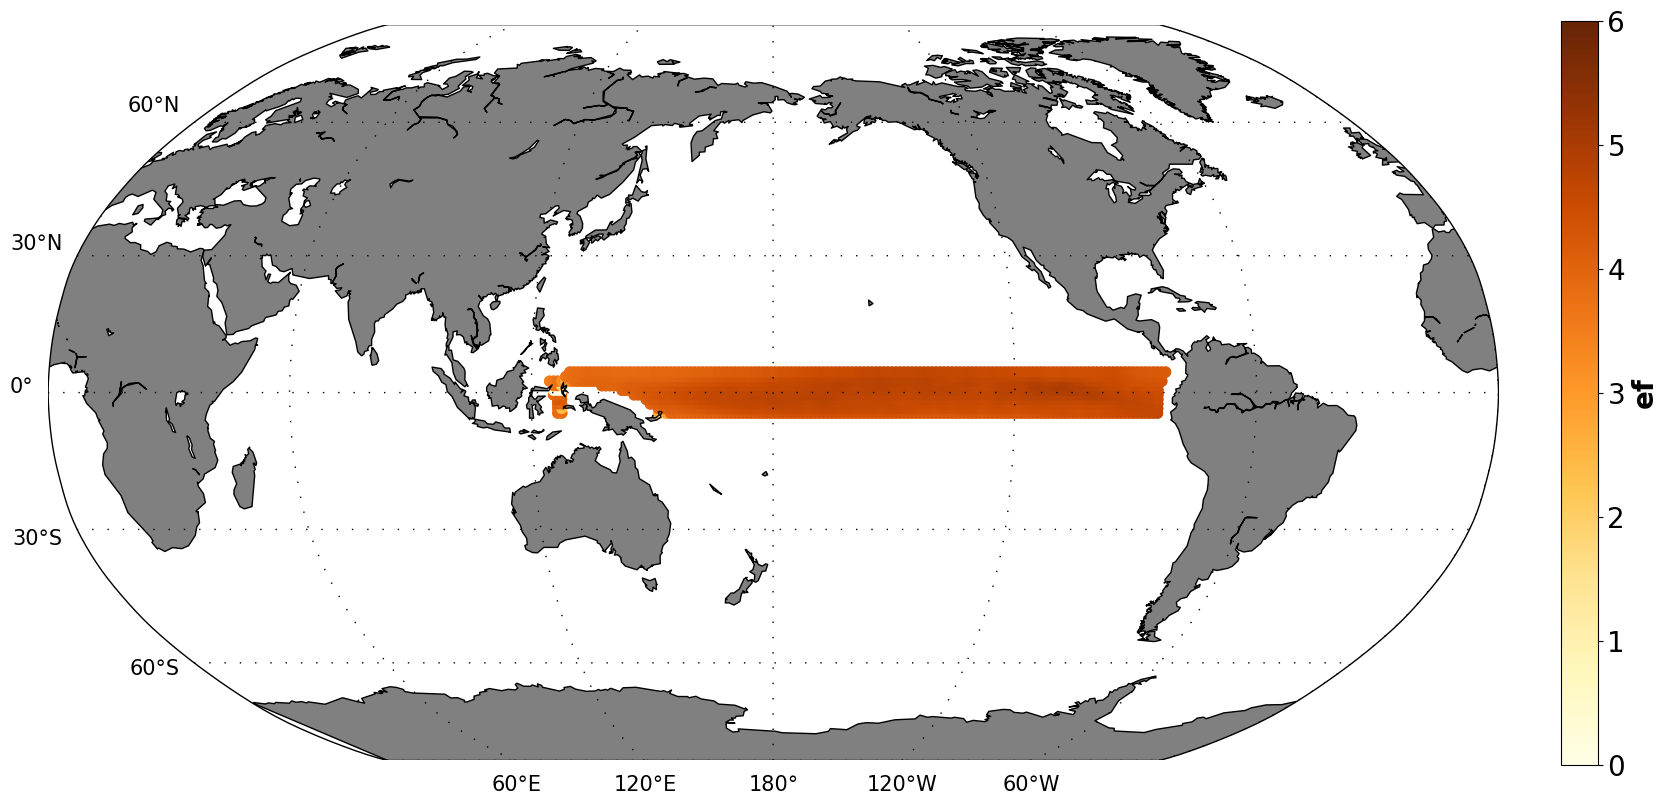

In [196]:
map(new, lon2, lat2, 0, 6, 'YlOrBr', 'ef')

0.6702031705760465


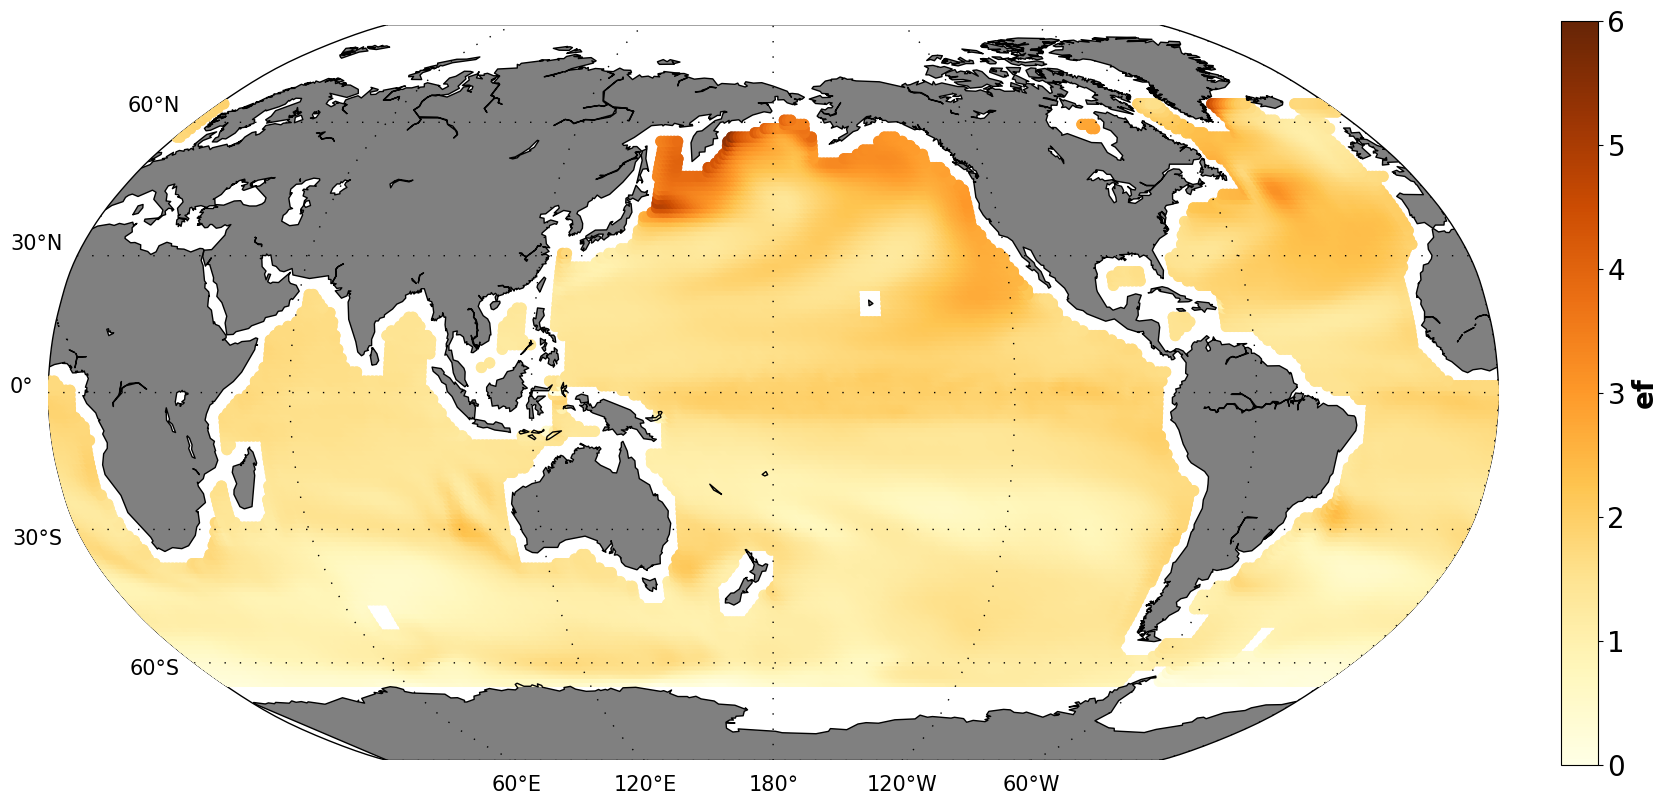

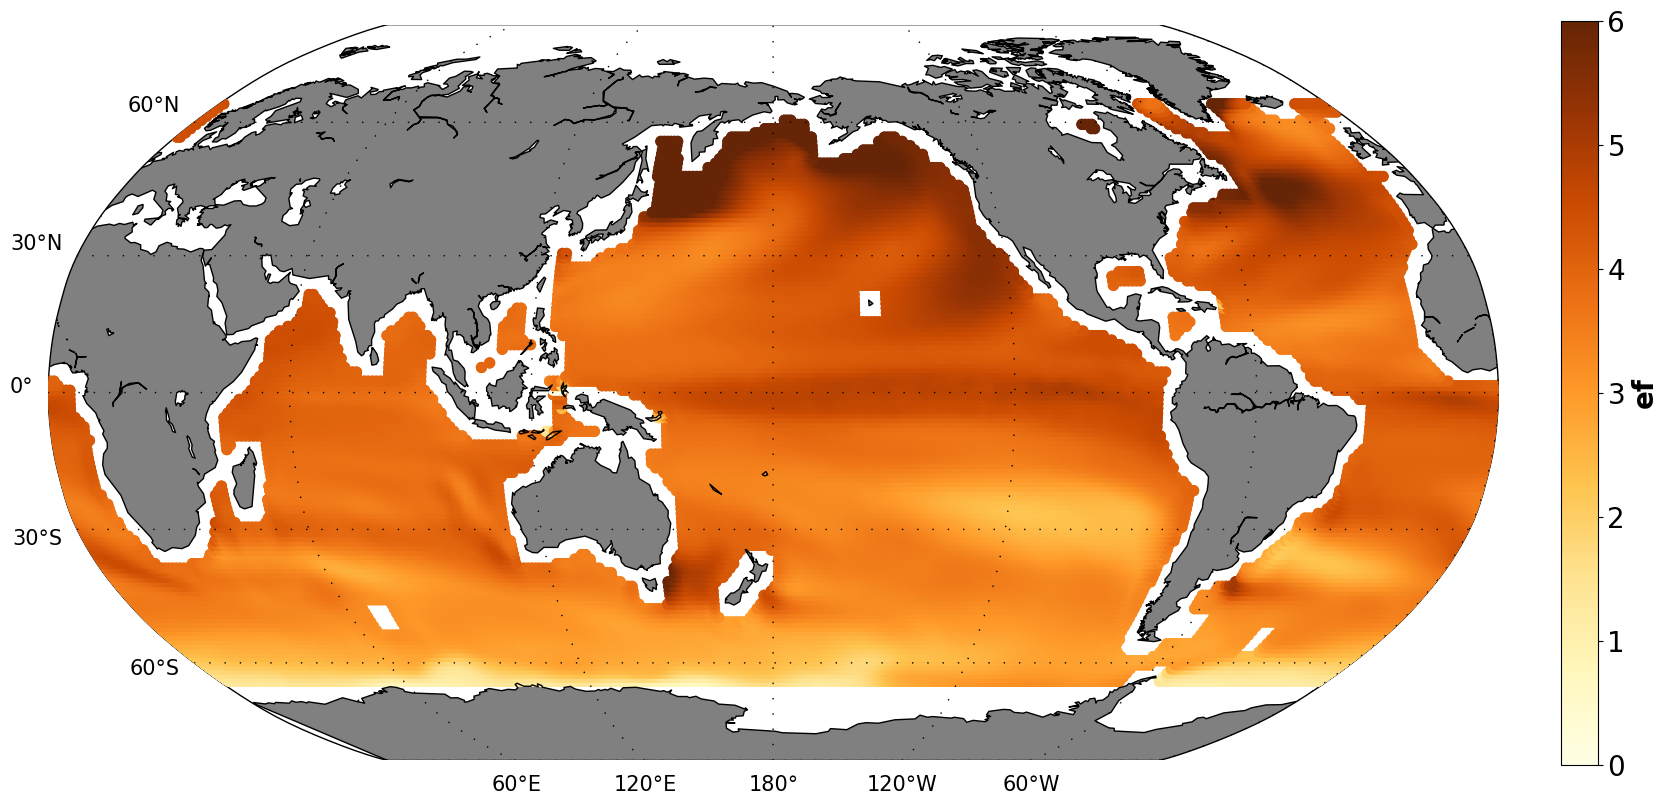

In [202]:
sst_diff_ab = np.nanmean(tos_b, axis=0) - np.nanmean(tos_a, axis=0)*final_mask
sst_diff_ac = np.nanmean(tos_c, axis=0) - np.nanmean(tos_a, axis=0)*final_mask

print(np.nanmin(sst_diff_ac*mask))

map(sst_diff_ab, lon2, lat2, 0, 6, 'YlOrBr', 'ef')
map(sst_diff_ac, lon2, lat2, 0, 6, 'YlOrBr', 'ef')

In [ ]:
print(np.nanmin(mld_diff_ac[90:,:]*mask[90:,:]))
print(np.nanmin(mld_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmax(mld_diff_ab[90:,:]*mask[90:,:]))
print(np.nanmax(mld_diff_ab[:90,:]*mask[:90,:]))

In [ ]:
mld_diff_ab = np.nanmean(mld_b, axis=0) - np.nanmean(mld_a, axis=0)
mld_diff_ac = np.nanmean(mld_c, axis=0) - np.nanmean(mld_a, axis=0)

print(np.nanmax(mld_diff_ac*mask))

map(mld_diff_ab*mask, lon2, lat2, -50, 50, 'RdBu', 'ef')
map(mld_diff_ac*mask, lon2, lat2, -50, 50, 'RdBu', 'ef')

In [ ]:
sst_diff_ab = np.nanmean(tos_b, axis=0) - np.nanmean(tos_a, axis=0)
sst_diff_ac = np.nanmean(tos_c, axis=0) - np.nanmean(tos_a, axis=0)

np.nanmin(sst_diff_ac*mask)

map(sst_diff_ab*mask, lon2, lat2, -200, 200, 'RdBu_r', 'ef')
map(sst_diff_ac*mask, lon2, lat2, -200, 200, 'RdBu_r', 'ef')

In [ ]:
print('Historical Basline (2000-2010): ', np.nanmean(ef_a))
print('SSP1-2.6 (2090-2100):           ', np.nanmean(ef_b))
print('SSP3-7.0 (2090-2100):           ', np.nanmean(ef_c))

In [ ]:
print('1. mean of each cell taken and then average - not relative')
print('2. mean of each cell taken and then averaged - relative to historical value')
print('3. temporal mean taken of each dataset then difference calculated - not relative')
print('4. temporal mean taken of each dataset then difference calculated - relative')
print('1 - SSP1-2.6: ', np.nanmean((ef_b - ef_a)))
print('2 - SSP1-2.6: ', np.nanmean((ef_b - ef_a)/ef_a)*100)
print('3 - SSP1-2.6: ', np.nanmean(np.nanmean(ef_b, axis=0) - np.nanmean(ef_a, axis=0)))
print('4 - SSP1-2.6: ', np.nanmean(((np.nanmean(ef_b, axis=0) - np.nanmean(ef_a, axis=0))/np.nanmean(ef_a))*100))
print('1 - SSP3-7.0: ', np.nanmean((ef_c - ef_a)))
print('2 - SSP3-7.0: ', np.nanmean((ef_c - ef_a)/ef_a)*100)
print('3 - SSP1-2.6: ', np.nanmean(np.nanmean(ef_c, axis=0) - np.nanmean(ef_a, axis=0)))
print('4 - SSP3-7.0: ', np.nanmean(((np.nanmean(ef_c, axis=0) - np.nanmean(ef_a, axis=0))/ np.nanmean(ef_a))*100))

In [ ]:
ef_diff_ab = np.nanmean((ef_b - ef_a), axis=0)
ef_diff_ac = np.nanmean((ef_c - ef_a), axis=0)

print(np.nanmean(ef_diff_ab))
print(np.nanmean(ef_diff_ac))

In [ ]:
map(ef_diff_ab*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'ef')
map(ef_diff_ac*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'ef')

In [ ]:
ef_diff_ab = np.nanmean(((ef_b - ef_a)/ef_a)*100, axis=0)
ef_diff_ac = np.nanmean(((ef_c - ef_a)/ef_a)*100, axis=0)

print(np.nanmean(ef_diff_ab))
print(np.nanmean(ef_diff_ac))

In [ ]:
map(ef_diff_ab*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'ef')
map(ef_diff_ac*final_mask, lon2, lat2, -100, 100, 'RdBu_r', 'ef')

In [ ]:
ef_diff_ab = ((np.nanmean(ef_b, axis=0) - np.nanmean(ef_a, axis=0))/np.nanmean(ef_a, axis=0))*100
ef_diff_ac = ((np.nanmean(ef_c, axis=0) - np.nanmean(ef_a, axis=0))/np.nanmean(ef_a, axis=0))*100

map(np.nanmean(ef_a, axis=0)*final_mask, lon2, lat2, 0, 200, 'viridis', 'ef')
map(np.nanmean(ef_b, axis=0)*final_mask, lon2, lat2, 0, 200, 'viridis', 'ef')
map(np.nanmean(ef_c, axis=0)*final_mask, lon2, lat2, 0, 200, 'viridis', 'ef')

In [ ]:
np.nanmax(np.nanmean(np.log(ef_c), axis=0))

In [ ]:
map(np.nanmean(np.log(ef_a), axis=0)*final_mask, lon2, lat2, 0, 4.5, 'viridis', 'ef')
map(np.nanmean(np.log(ef_b), axis=0)*final_mask, lon2, lat2, 0, 4.5, 'viridis', 'ef')
map(np.nanmean(np.log(ef_c), axis=0)*final_mask, lon2, lat2, 0, 4.5, 'viridis', 'ef')

In [ ]:
print(np.nanmean(ef_diff_ac[90:,:]*mask[90:,:]))
print(np.nanmean(ef_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmean(ef_diff_ab[90:,:]*mask[90:,:]))
print(np.nanmean(ef_diff_ab[:90,:]*mask[:90,:]))

In [ ]:
print(np.nanmin(ef_diff_ac[90:,:]*mask[90:,:]))
print(np.nanmin(ef_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmean(ef_diff_ac[90:,:]*mask[90:,:]))
print(np.nanmean(ef_diff_ac[:90,:]*mask[:90,:]))

print(np.nanmean(ef_diff_ab[90:,:]*mask[90:,:]))
print(np.nanmean(ef_diff_ab[:90,:]*mask[:90,:]))

In [ ]:
start_b.shape

In [ ]:
print(np.nanmin(start_diff_ab))

In [ ]:
start_diff_ab

In [ ]:
np.nanmin(start_a)

In [ ]:
### start

def calculate_adjusted_difference(start_a, start_c):
    adjusted_diff = np.zeros_like(start_a)

    for i in range(start_a.shape[0]):
        for j in range(start_a.shape[1]):
            diff = start_a[i, j] - start_c[i, j]

            if diff > 182 or diff < -182:
                if start_a[i, j] > start_c[i, j]:
                    adjusted_diff[i, j] = (365 - start_a[i, j]) + start_c[i, j]
                else:
                    adjusted_diff[i, j] = -((365 - start_c[i, j]) + start_a[i, j])
            else:
                adjusted_diff[i, j] = start_c[i, j] - start_a[i, j]

    return adjusted_diff

# Apply the function to your data
adjusted_diff_ab = start_a_low - start_b
adjusted_diff_ac = start_a_high - start_c

In [ ]:
import numpy as np

def seasons(start):
    # Initialize the seasons array with zeros and the same shape as start.
    seasons = np.zeros_like(start)
    
    for i in np.arange(0,180,1):
        for j in np.arange(0,360,1):
            # Check if value is NaN before assigning seasons
            if not np.isnan(start[i,j]):
                # Winter
                if (start[i,j] >= 355 and start[i,j] <= 365) or (start[i,j] >= 1 and start[i,j] <= 79):
                    seasons[i,j] = 4  # Assuming 1 represents winter
                # Spring
                elif 80 <= start[i,j] <= 171:
                    seasons[i,j] = 1  # Assuming 2 represents spring
                # Summer
                elif 172 <= start[i,j] <= 264:
                    seasons[i,j] = 2  # Assuming 3 represents summer
                # Autumn
                elif 265 <= start[i,j] <= 354:
                    seasons[i,j] = 3  # Assuming 4 represents autumn


    return seasons


In [ ]:
start_1a.shape

In [ ]:
np.nanmin(start_1a)

In [ ]:
import numpy as np

def seasons_stand(start1, start2):
    # Initialize the seasons array with zeros and the same shape as start.
    diff = np.zeros_like(start1)
    
    # Your loop structure seems fine, so you can keep that the same.
    for i in np.arange(0,180,1):
        for j in np.arange(0,360,1):
            if start1[i,j] == 1:
                if start2[i,j] == 1:
                    diff[i,j] = 0
                if start2[i,j] == 2:
                    diff[i,j] = 1
                if start2[i,j] == 4:
                    diff[i,j] = -1
                if start2[i,j] == 3:
                    diff[i,j] = 2
            if start1[i,j] == 2:
                if start2[i,j] == 2:
                    diff[i,j] = 0
                if start2[i,j] == 3:
                    diff[i,j] = 1
                if start2[i,j] == 1:
                    diff[i,j] = -1
                if start2[i,j] == 4:
                    diff[i,j] = 2
            if start1[i,j] == 3:
                if start2[i,j] == 3:
                    diff[i,j] = 0
                if start2[i,j] == 4:
                    diff[i,j] = 1
                if start2[i,j] == 2:
                    diff[i,j] = -1
                if start2[i,j] == 1:
                    diff[i,j] = 2
            if start1[i,j] == 4:
                if start2[i,j] == 4:
                    diff[i,j] = 0
                if start2[i,j] == 1:
                    diff[i,j] = 1
                if start2[i,j] == 3:
                    diff[i,j] = -1
                if start2[i,j] == 2:
                    diff[i,j] = 2
    return diff

In [ ]:
seasons_a = seasons(start_1a)
seasons_b = seasons(start_2a)
seasons_c = seasons(start_3a)

seasons_ab = seasons_stand(seasons_a, seasons_b)
seasons_ac = seasons_stand(seasons_a, seasons_c)

In [ ]:
map(start_1a*mask, lon2, lat2, 1, 365, 'twilight_shifted', 'start')
map(start_2a*mask, lon2, lat2, 1, 365, 'twilight_shifted', 'start')
map(start_3a*mask, lon2, lat2, 1, 365, 'twilight_shifted', 'start')

In [ ]:
import numpy as np

# Assuming seasons_ac is already defined and is a numpy array
# Create a mask for non-NaN values
non_nan_mask = ~np.isnan(seasons_c)

# Use the non-NaN mask to find elements that are non-zero
non_zero_mask = non_nan_mask & (seasons_c != 0) 

# Count the number of True values in the non_zero_mask
non_zero_count = np.sum(non_zero_mask)

# Count the total number of non-NaN elements
total_non_nan = np.sum(non_nan_mask)

# Calculate the percentage of non-NaN elements that are non-zero
percentage_non_zero = (non_zero_count / total_non_nan) * 100

percentage_non_zero



In [ ]:
import numpy as np

# Assuming seasons_c is already defined and is a numpy array

# Create a mask for non-NaN and non-zero values
valid_mask = ~np.isnan(seasons_a) & (seasons_a != 0)

# Create a mask specifically for elements equal to 2
value_2_mask = (seasons_a == 4)

# Combine the masks to identify elements that are non-NaN, non-zero, and equal to 2
combined_mask = valid_mask & value_2_mask

# Count the number of True values in the combined mask
count_value_2 = np.sum(combined_mask)

# Count the total number of valid (non-NaN, non-zero) elements
total_valid = np.sum(valid_mask)

# Calculate the percentage of valid elements that are equal to 2
percentage_value_2 = (count_value_2 / total_valid) * 100 if total_valid > 0 else 0

percentage_value_2


In [ ]:
print("Count of Value 2 Cells:", count_value_2)
print("Total Valid Cells:", total_valid)


In [ ]:
summer - 28.01 31.3
spring - 9.5 14.6
winter - 32.2 26.3
autumn - 30.2 27.6

In [ ]:
map(seasons_ab*mask, lon2, lat2, -2, 2, 'twilight_shifted', 'start')
map(seasons_ac*mask, lon2, lat2, -2, 2, 'twilight_shifted', 'start')


map(seasons_a*mask, lon2, lat2, 0, 4, 'viridis_r', 'start')
map(seasons_b*mask, lon2, lat2, 1, 4, 'viridis_r', 'start')
map(seasons_c*mask, lon2, lat2, 1, 4, 'viridis_r', 'start')

In [ ]:
print(np.nanmean(adjusted_diff_ab))
print(np.nanmean(adjusted_diff_ac))

In [ ]:
map(adjusted_diff_ab*mask, lon2, lat2, -180, 180, 'RdBu_r', 'start')
map(adjusted_diff_ac*mask, lon2, lat2, -180, 180, 'RdBu_r', 'start')

Masks

In [39]:
nc_z = '../../export_chapter_4/data/masks/basin_masks.nc'
nc_zd = Dataset(nc_z, 'r')
print(nc_zd)

P1 = np.squeeze(nc_zd.variables['P1'][:], axis=0)
P2 = np.squeeze(nc_zd.variables['P2'][:], axis=0)
P3 = np.squeeze(nc_zd.variables['P3'][:], axis=0)
P4 = np.squeeze(nc_zd.variables['P4'][:], axis=0)
P5 = np.squeeze(nc_zd.variables['P5'][:], axis=0)

A1 = np.squeeze(nc_zd.variables['A1'][:], axis=0)
A2 = np.squeeze(nc_zd.variables['A2'][:], axis=0)
A3 = np.squeeze(nc_zd.variables['A3'][:], axis=0)
A4 = np.squeeze(nc_zd.variables['A4'][:], axis=0)
A5 = np.squeeze(nc_zd.variables['A5'][:], axis=0)

I3 = np.squeeze(nc_zd.variables['I3'][:], axis=0)
I4 = np.squeeze(nc_zd.variables['I4'][:], axis=0)
I5 = np.squeeze(nc_zd.variables['I5'][:], axis=0)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.6 (optimized)  6-Sep-21
    Conventions: CF-1.6
    dimensions(sizes): X(360), Y(180), Z1_1(1), bnds(2)
    variables(dimensions): float32 X(X), float32 Y(Y), float32 Z1_1(Z1_1), float32 Z1_1_bnds(Z1_1, bnds), float64 ATL(Z1_1, Y, X), float64 PAC(Z1_1, Y, X), float64 IND(Z1_1, Y, X), float64 SO(Z1_1, Y, X), float64 ARCTIC(Z1_1, Y, X), float64 P1(Z1_1, Y, X), float64 P2(Z1_1, Y, X), float64 P3(Z1_1, Y, X), float64 P4(Z1_1, Y, X), float64 P5(Z1_1, Y, X), float64 A1(Z1_1, Y, X), float64 A2(Z1_1, Y, X), float64 A3(Z1_1, Y, X), float64 A4(Z1_1, Y, X), float64 A5(Z1_1, Y, X), float64 I3(Z1_1, Y, X), float64 I4(Z1_1, Y, X), float64 I5(Z1_1, Y, X)
    groups: 


In [40]:
mask1 = np.ones((180,360))*np.nan
mask2 = np.ones((180,360))*np.nan
mask3 = np.ones((180,360))*np.nan
mask4 = np.ones((180,360))*np.nan
mask5 = np.ones((180,360))*np.nan

# Iterate over each element
for i in range(mask1.shape[0]):
    for j in range(mask1.shape[1]):
        if P1[i, j] > 0 or A1[i, j] > 0:
            mask1[i, j] = 1
        if P2[i, j] > 0 or A2[i, j] > 0:
            mask2[i, j] = 1
        if P3[i, j] > 0 or A3[i, j] > 0 or I3[i, j] > 0:
            mask3[i, j] = 1
        if P4[i, j] > 0 or A4[i, j] > 0 or I5[i, j] > 0:
            mask4[i, j] = 1
        if P5[i, j] > 0 or A5[i, j] > 0 or I5[i, j] > 0:
            mask5[i, j] = 1


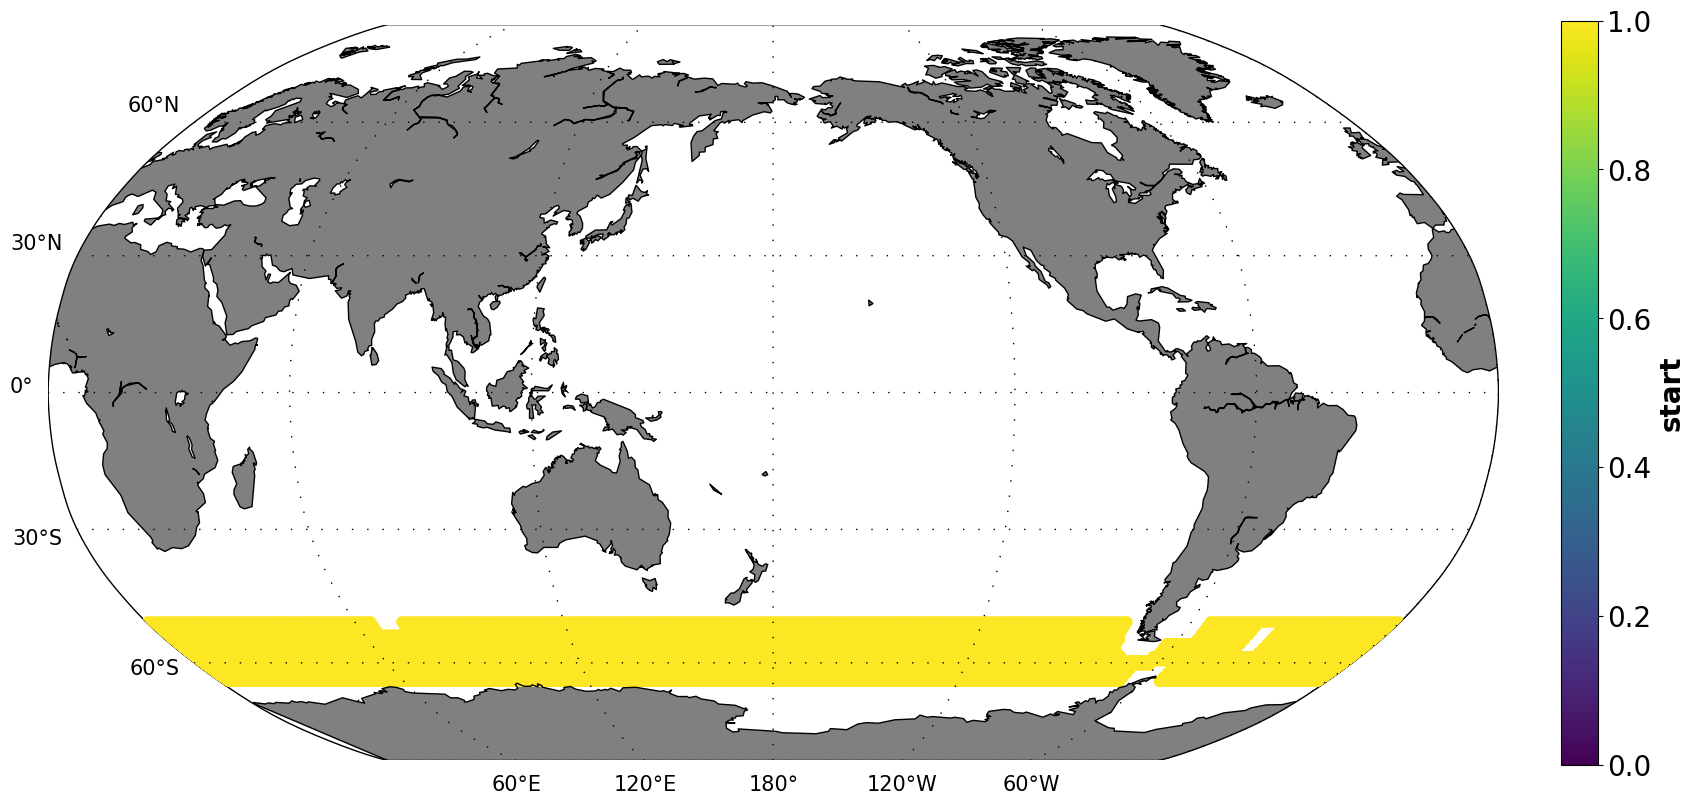

In [41]:
map(mask5*final_mask, lon2, lat2, 0, 1, 'viridis', 'start')


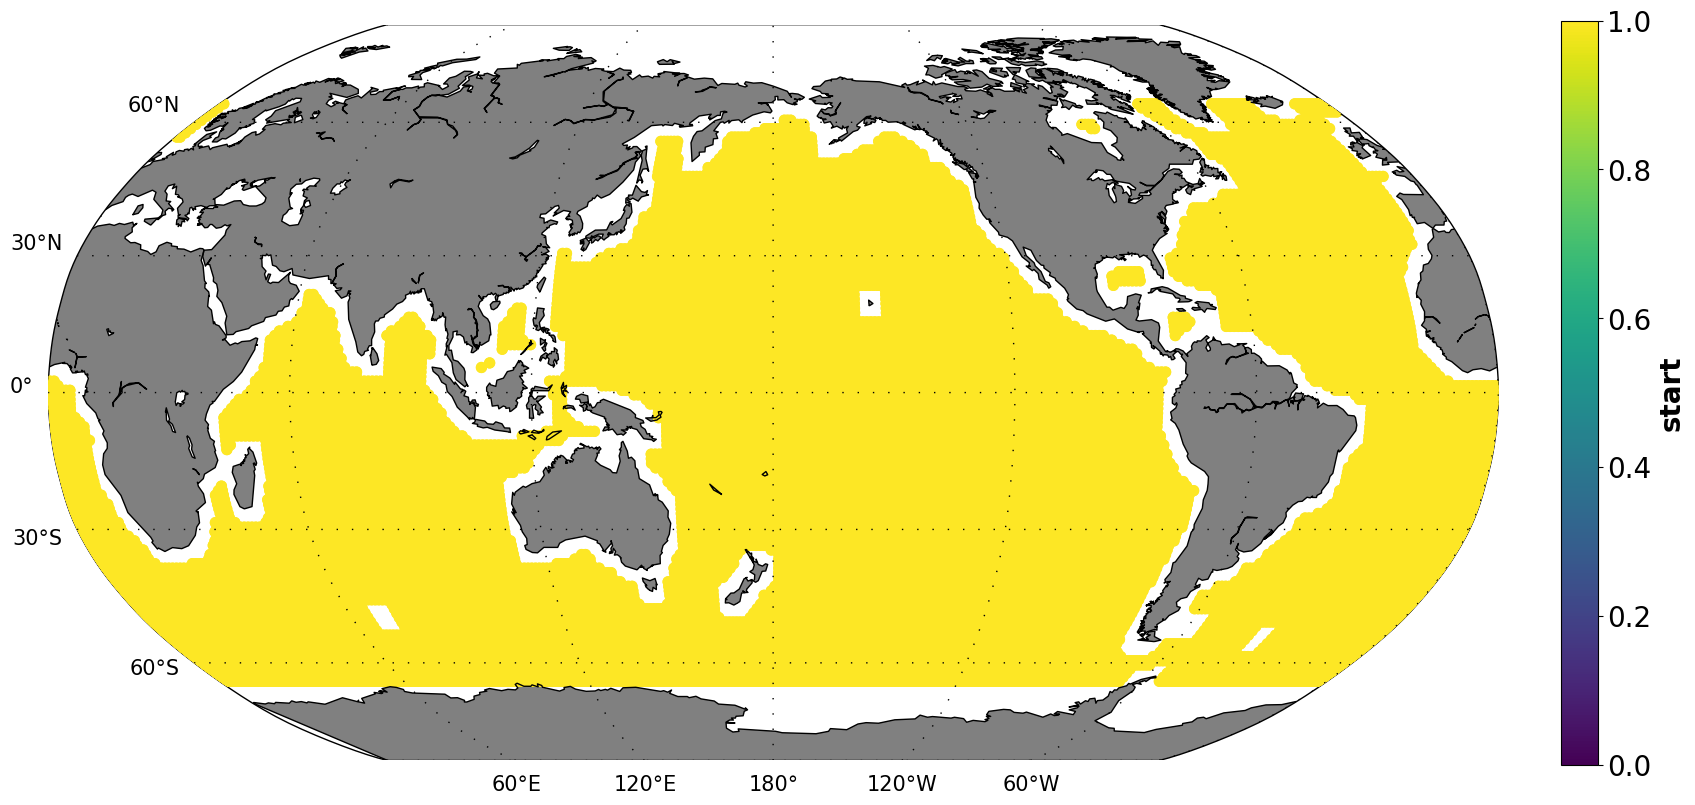

In [42]:
map(final_mask, lon2, lat2, 0, 1, 'viridis', 'start')

In [71]:
import numpy as np
import pandas as pd

# Define the variables and their labels
variables = ['tos', 'mld', 'tchl', 'ppt',  'dur', 'exp', 'ef']
suffix_labels = {'_a': 'Historical', '_b': 'SSP1', '_c': 'SSP3'}

# Masks and their corresponding geographic zones
masks = [final_mask, mask1, mask2, mask3, mask4, mask5]
zones = ['Global', 'Subpolar North', 'Subtropical North', 'Tropical', 'Subtropical South', 'Subpolar South']

# Create a multi-index for columns
multi_index = pd.MultiIndex.from_product([variables, list(suffix_labels.values())], names=['Variable', 'Scenario'])

# Initialise a DataFrame with multi-index columns and zone rows
df = pd.DataFrame(index=zones, columns=multi_index)

# Populate the DataFrame
for var in variables:
    for suffix, label in suffix_labels.items():
        for zone, mask in zip(zones, masks):
            var_name = f'{var}{suffix}'
            mean_val = np.nanmean(globals()[var_name] * mask)
            df.loc[zone, (var, label)] = mean_val

# Display the DataFrame
print(df)
df.to_csv('mean_rmse_diad.csv')


Variable                 tos                              mld             \
Scenario          Historical       SSP1       SSP3 Historical       SSP1   
Global             16.884656  18.321652  20.564562   48.02606  45.814703   
Subpolar North      6.987255   9.569599  12.380113  31.902621  31.641473   
Subtropical North   21.59082  23.387009  25.813552  38.437554  36.277997   
Tropical           27.008778  28.593479  31.030094  30.432369  30.223807   
Subtropical South  13.742719  14.886538  16.901162  54.953578  53.901547   
Subpolar South      1.413247   2.156986   3.476069   59.08524   55.28531   

Variable                           tchl                             ppt  ...  \
Scenario                SSP3 Historical      SSP1      SSP3  Historical  ...   
Global             42.713016   1.650832  1.503848  1.310433    181.6412  ...   
Subpolar North     30.719204   7.770632  9.459184  8.593164  375.253877  ...   
Subtropical North  34.564115   2.584578  2.277122  2.064478  286.966693

Upload PTRC Variables

In [44]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_PIC_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
PIC_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_PIC_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
PIC_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_PIC_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
PIC_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6

In [45]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_FIX_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
FIX_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_FIX_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
FIX_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_FIX_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
FIX_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [46]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_COC_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
COC_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_COC_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
COC_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_COC_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
COC_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [47]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_MIX_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
MIX_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_MIX_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
MIX_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_MIX_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
MIX_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [48]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_DIA_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
DIA_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_DIA_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
DIA_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_DIA_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
DIA_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [49]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_PHA_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
PHA_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_PHA_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
PHA_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_PHA_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
PHA_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [50]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_BAC_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
BAC_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_BAC_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
BAC_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_BAC_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
BAC_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [51]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_PRO_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
PRO_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_PRO_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
PRO_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_PRO_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
PRO_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [52]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_PTE_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
PTE_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_PTE_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
PTE_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_PTE_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
PTE_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6

In [53]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_MES_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
MES_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_MES_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
MES_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_MES_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
MES_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [54]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_MAC_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
MAC_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_MAC_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
MAC_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_MAC_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
MAC_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [55]:
nc_a = '../data/clim_ptrc/TOM12_JG_1AA6_GEL_2000_2010_clim.nc'
nc_ad = Dataset(nc_a, 'r')
GEL_a = nc_ad.variables['DAILYCLIM'][:]*10*12*1e6

nc_b = '../data/clim_ptrc/TOM12_JG_1AA6_GEL_2090_2100_clim.nc'
nc_bd = Dataset(nc_b, 'r')
GEL_b = nc_bd.variables['DAILYCLIM'][:]*10*12*1e6

nc_c = '../data/clim_ptrc/TOM12_JG_1BA6_GEL_2090_2100_clim.nc'
nc_cd = Dataset(nc_c, 'r')
GEL_c = nc_cd.variables['DAILYCLIM'][:]*10*12*1e6


In [56]:
import numpy as np
import pandas as pd

# Define the variables and their labels
variables = ['PIC', 'FIX', 'COC', 'MIX', 'DIA', 'PHA']
suffix_labels = {'_a': 'Historical', '_b': 'SSP1', '_c': 'SSP3'}

# Masks and their corresponding geographic zones
masks = [final_mask, mask1, mask2, mask3, mask4, mask5]
zones = ['Global', 'Subpolar North', 'Subtropical North', 'Tropical', 'Subtropical South', 'Subpolar South']

# Create a multi-index for columns
multi_index = pd.MultiIndex.from_product([variables, list(suffix_labels.values())], names=['Variable', 'Scenario'])

# Initialise a DataFrame with multi-index columns and zone rows
df = pd.DataFrame(index=zones, columns=multi_index)

# Populate the DataFrame
for var in variables:
    for suffix, label in suffix_labels.items():
        for zone, mask in zip(zones, masks):
            var_name = f'{var}{suffix}'
            mean_val = np.nanmean(globals()[var_name] * mask)
            df.loc[zone, (var, label)] = mean_val

# Display the DataFrame
print(df)
df.to_csv('mean_rmse_phyto.csv')

Variable                  PIC                                  FIX  \
Scenario           Historical        SSP1        SSP3   Historical   
Global             145.657382  110.838649   93.085936   306.252713   
Subpolar North      80.202664  187.182961  460.112901     0.500936   
Subtropical North  436.467792  399.735752  335.384815   229.261241   
Tropical           229.252738  122.693246   34.839036  1121.026082   
Subtropical South   92.602415   87.043342   68.338257    36.568803   
Subpolar South       0.526409    0.926188    1.366794     0.143652   

Variable                                            COC              \
Scenario                  SSP1         SSP3  Historical        SSP1   
Global              294.964984   341.749633  191.145217  189.477066   
Subpolar North        0.700601     7.453946   60.395675   119.32308   
Subtropical North   261.736211   447.500376  346.276913  305.863042   
Tropical           1098.777449  1179.432435   52.344984    40.89789   
Subtropical S

In [57]:
import numpy as np
import pandas as pd

# Define the variables and their labels
variables = ['BAC', 'PRO', 'PTE', 'MES', 'MAC', 'GEL']
suffix_labels = {'_a': 'Historical', '_b': 'SSP1', '_c': 'SSP3'}

# Masks and their corresponding geographic zones
masks = [final_mask, mask1, mask2, mask3, mask4, mask5]
zones = ['Global', 'Subpolar North', 'Subtropical North', 'Tropical', 'Subtropical South', 'Subpolar South']

# Create a multi-index for columns
multi_index = pd.MultiIndex.from_product([variables, list(suffix_labels.values())], names=['Variable', 'Scenario'])

# Initialise a DataFrame with multi-index columns and zone rows
df = pd.DataFrame(index=zones, columns=multi_index)

# Populate the DataFrame
for var in variables:
    for suffix, label in suffix_labels.items():
        for zone, mask in zip(zones, masks):
            var_name = f'{var}{suffix}'
            mean_val = np.nanmean(globals()[var_name] * mask)
            df.loc[zone, (var, label)] = mean_val

# Display the DataFrame
print(df)
df.to_csv('mean_rmse_zoo.csv')

Variable                  BAC                                PRO             \
Scenario           Historical        SSP1       SSP3  Historical       SSP1   
Global              55.364965   49.673788  41.450395    64.97142  47.916193   
Subpolar North     212.223814  258.380993  231.19056  412.057449  200.63295   
Subtropical North   88.376868   74.912257  58.785711   43.365861  38.213284   
Tropical            30.136516   19.202926  10.993804   31.985888  32.710143   
Subtropical South   49.792963   42.355472  34.285779   60.402161  58.211973   
Subpolar South      36.689989   33.943625  41.057358   40.971461  32.102985   

Variable                             PTE                            \
Scenario                SSP3  Historical         SSP1         SSP3   
Global             37.358901   142.15203   140.612539    97.003562   
Subpolar North     119.43812    847.1859  1270.329469  1088.328866   
Subtropical North  23.339749  262.996283    220.11709   143.787997   
Tropical         

### Plot Colormap

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_rgba

def plot_colormap(variables, colorbar_min, colorbar_max, a):
    scenario_labels = ['Baseline', 'SSP1', 'SSP3']

    # Masks and their corresponding geographic zones
    masks = [final_mask, mask1, mask2, mask3, mask4, mask5]
    zones = ['Global', 'Subpolar North', 'Subtropical North', 'Tropical', 'Subtropical South', 'Subpolar South']

    # Create a DataFrame to hold the values and a separate DataFrame for coloring
    df_values = pd.DataFrame(index=zones, columns=[f'{var}_{scenario}' for var in variables for scenario in scenario_labels], dtype=object)

    df_diff = pd.DataFrame(index=zones)
    for var in variables:
        for i, scenario in enumerate(scenario_labels):
            suffix = f'_{chr(ord("a") + i)}'  # '_a' for Baseline, '_b' for SSP1, '_c' for SSP3
            for zone, mask in zip(zones, masks):
                var_name = f'{var}{suffix}'
                scenario_array = globals()[var_name] * mask
                df_values.loc[zone, f'{var}_{scenario}'] = scenario_array
                baseline_val = df_values.loc[zone, f'{var}_Baseline']
                if var == 'start':
                    df_diff.loc[zone, f'{var}_{scenario}'] = np.nanmean(scenario_array - baseline_val)
                elif var == 'tchl':
                    df_diff.loc[zone, f'{var}_{scenario}'] = (((10**np.nanmean(np.log(scenario_array))) - (10**np.nanmean(np.log(baseline_val))))/
                                                                (10**np.nanmean(np.log(baseline_val))))*100
                else:
                    df_diff.loc[zone, f'{var}_{scenario}'] = np.nanmean((((scenario_array - baseline_val) / baseline_val) * 100))
                if scenario == 'Baseline':
                    df_diff.loc[zone, f'{var}_{scenario}'] = 0
    
    df_values = pd.DataFrame(index=zones)
    for var in variables:
        for i, scenario in enumerate(scenario_labels):
            suffix = f'_{chr(ord("a") + i)}'  # '_a' for Baseline, '_b' for SSP1, '_c' for SSP3
            for zone, mask in zip(zones, masks):
                var_name = f'{var}{suffix}'
                if var == 'tchl':
                    mean_val = 10**np.nanmean(np.log((globals()[var_name] * mask)))
                else:
                    mean_val = np.nanmean(globals()[var_name] * mask)
                df_values.loc[zone, f'{var}_{scenario}'] = mean_val


    # Normalize the differences for color mapping
    norm = Normalize(vmin=colorbar_min, vmax=colorbar_max)

    # Rearrange columns for the heatmap
    cols_order = [f'{var}_{scenario}' for var in variables for scenario in scenario_labels]
    df_values = df_values[cols_order]
    df_diff = df_diff[cols_order]

    # Plotting the heatmap
    fig, ax = plt.subplots(figsize=(a, 4.5))

    # Use pcolor for color mapping
    c = ax.pcolor(df_diff, cmap='bwr', norm=norm)

    # Add color bar
    plt.colorbar(c, ax=ax)

    # Function to determine text color based on background color
    def text_color_for_background(background_color, scenario):
        if scenario == 'Baseline':
            df_diff = 0
            return 'black'
        r, g, b, _ = to_rgba(background_color)

        # Adjusted luminance calculation for better contrast with blue hues
        luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
        return 'white' if luminance < 0.6 else 'black'

    text_font_size = 12  # Example size, adjust as needed

    for (i, j), val in np.ndenumerate(df_values):
        scenario = scenario_labels[j % len(scenario_labels)]
        cmap = plt.get_cmap('bwr')
        bg_color = cmap(norm(df_diff.iloc[i, j]))
        txt_color = text_color_for_background(bg_color, scenario)

        # Formatting the value based on its magnitude
        if abs(val) >= 1:
            formatted_val = f'{val:.1f}'  # One decimal place for values >= 1
        else:
            formatted_val = f'{val:.2g}'  # Two significant figures for values < 1

        # Set font weight to bold if text color is white
        font_weight = 'bold' if txt_color == 'white' else 'normal'

        # Use formatted_val in ax.text
        ax.text(j + 0.5, i + 0.5, formatted_val, ha='center', va='center', 
                color=txt_color, weight=font_weight, fontsize=text_font_size)


    # Setting the labels
    for i in range(len(df_values.columns)):
        if i % 3 == 0:  # Every third gridline corresponds to the start of a new variable group
            ax.axvline(x=i, color='black', linewidth=1)  # Make the gridline thicker

    # Set x-ticks and y-ticks
    ax.set_xticks(np.arange(len(df_values.columns)) + 0.5)
    ax.set_yticks(np.arange(len(df_values.index)) + 0.5)

    # Customize font size for x-ticks and y-ticks
    tick_font_size = 14  # You can change this value as needed
    ax.tick_params(axis='x', labelsize=tick_font_size)
    ax.tick_params(axis='y', labelsize=tick_font_size)

    ax.set_xticklabels(['Baseline', 'SSP1-2.6', 'SSP3-7.0'] * len(variables), rotation=90)


    # Add the top-level variable labels
    for i, var in enumerate(variables):
        ax.text(i * 3 + 1.3, -0.3, var, color='black', weight='bold', fontsize=10)
        
    # Set the row labels
    ax.set_yticklabels(zones)

    # Invert y-axis to display 'Global' at the top
    ax.invert_yaxis()
    plt.tight_layout()
    return plt.show()


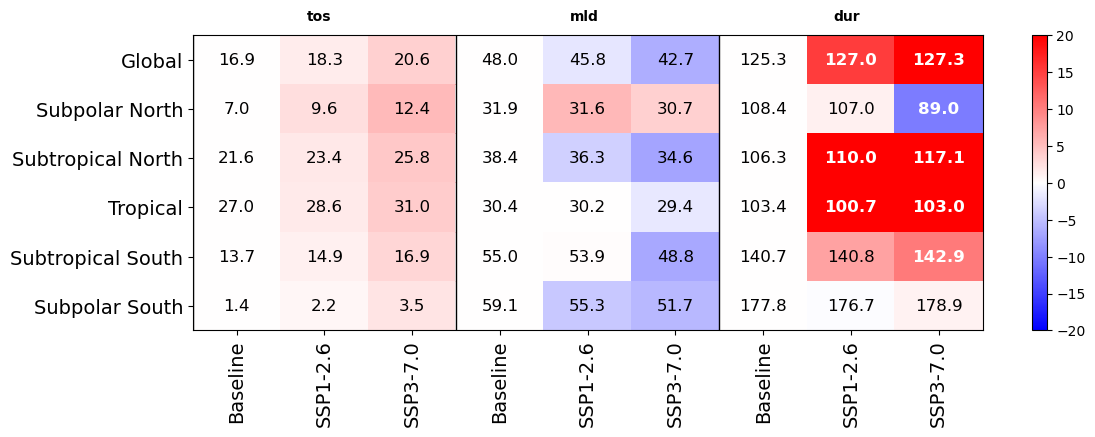

In [113]:
variables = ['tos', 'mld', 'dur']
plot_colormap(variables, -20, 20, 12)

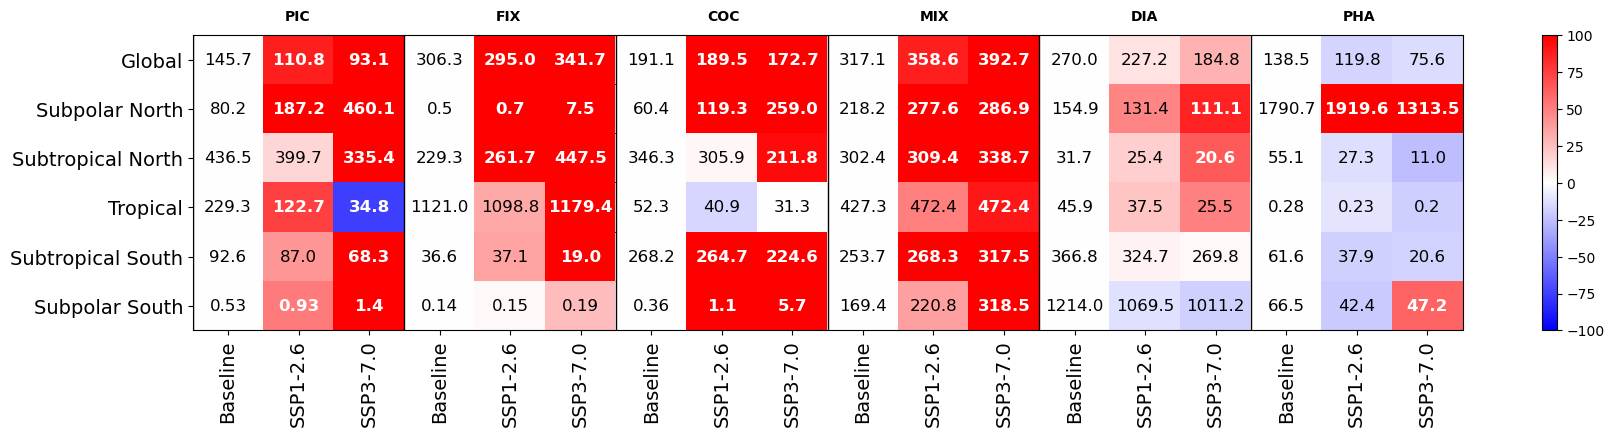

In [60]:
# Define the variables and their labels
variables = ['PIC', 'FIX', 'COC', 'MIX', 'DIA', 'PHA']
plot_colormap(variables, -100, 100, 18)

In [ ]:
# Define the variables and their labels
variables = ['BAC', 'PRO', 'PTE', 'MES', 'MAC', 'GEL']
plot_colormap(variables, -100, 100, 18)

In [111]:
pptave_a = np.nanmean(ppt_a, axis=0)*final_mask
pptave_b = np.nanmean(ppt_b, axis=0)*final_mask
pptave_c = np.nanmean(ppt_c, axis=0)*final_mask

expave_a = np.nanmean(exp_a, axis=0)*final_mask
expave_b = np.nanmean(exp_b, axis=0)*final_mask
expave_c = np.nanmean(exp_c, axis=0)*final_mask

efave_a = (expave_a/pptave_a)*100*final_mask
efave_b = (expave_b/pptave_b)*100*final_mask
efave_c = (expave_c/pptave_c)*100*final_mask

/Users/vsz14eru/anaconda3/envs/phenology/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/Users/vsz14eru/anaconda3/envs/phenology/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/Users/vsz14eru/anaconda3/envs/phenology/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


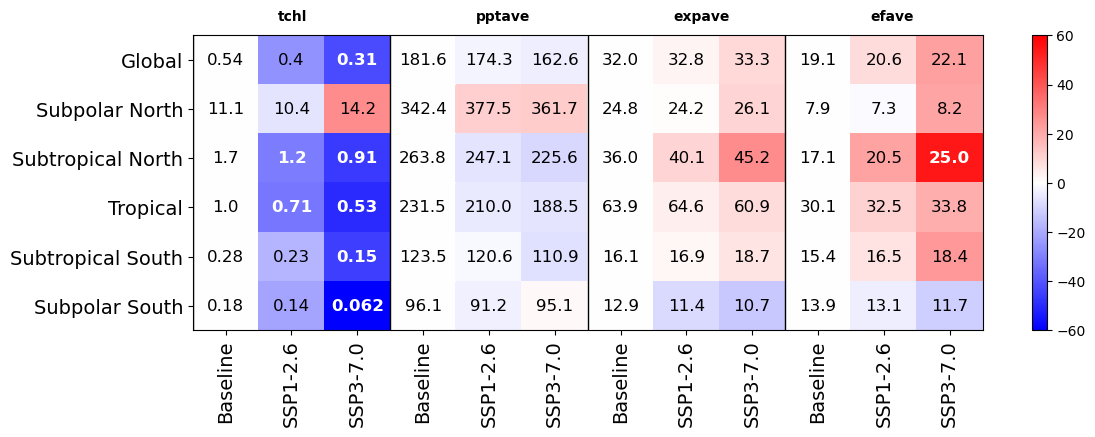

In [210]:
variables = ['tchl', 'pptave', 'expave', 'efave']
plot_colormap(variables, -60, 60, 12)